In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np
data = pd.read_json("finalDatasetTrump.json")

data['created_at'] = pd.to_datetime(data.created_at, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
data.reset_index(inplace=True,drop=True)

data['month'] = [d.month for d in data['created_at']]
data["year"] = [d.year for d in data["created_at"]]
data["hour"] = [d.hour for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]
data["date"] = [d.date() for d in data["created_at"]]

data.drop(["created_at"],inplace=True,axis=1)
#lowercase everything
data['modded_text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data["year"].value_counts()
print(len(data))

37779


In [5]:
len(data[data["is_retweet"] == True]["text"])

1423

In [8]:
#don't take into account retweets, not written by him
data = data[data["is_retweet"] == False]
print(len(data))

36356


In [9]:
#rimuovi i tag meno frequenti
tags = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    for tag in l:
        if tag in tags:
            tags[tag] = tags[tag] + 1
        else:
            tags[tag] = 1
print("total unique",len(tags))

common = []
uncommon = []
for el in tags:
    if tags[el] >= 10:
        common.append(el)
    if tags[el] < 10:
        uncommon.append(el)
print("unique uncommon", len(uncommon))
print("unique common",len(common))

t = []
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    g = row["modded_text"]
    for el in row["modded_text"].split():
        if el in uncommon:
            g = row["modded_text"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 13832
unique uncommon 13533
unique common 299


<function matplotlib.pyplot.show(*args, **kw)>

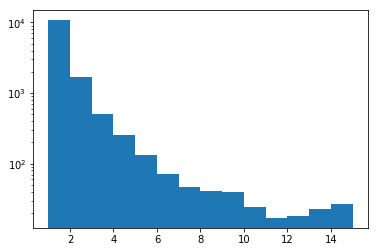

In [10]:
sortedList = list(tags.values())
sortedList.sort(reverse =True)

plt.hist(sortedList,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],log=True)
plt.show

In [11]:
#check correctly removed stuff
tags1 = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded1"])
    for tag in l:
        if tag in tags1:
            tags1[tag] = tags1[tag] + 1
        else:
            tags1[tag] = 1
print(len(tags1))

10810


In [12]:
data

,in_reply_to_user_id_str,is_retweet,text,month,year,hour,week_year,date,modded_text,modded1
0,NaN,False,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,be sure to tune in and watch donald trump on l...
1,NaN,False,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump will be appearing on the view tom...
2,NaN,False,Donald Trump reads Top Ten Financial Tips on L...,5,2009,13,19,2009-05-08,donald trump reads top ten financial tips on l...,donald trump reads top ten financial tips on l...
3,NaN,False,New Blog Post: Celebrity Apprentice Finale and...,5,2009,20,19,2009-05-08,new blog post: celebrity apprentice finale and...,new blog post: celebrity apprentice finale and...
4,NaN,False,"""My persona will never be that of a wallflower...",5,2009,14,20,2009-05-12,"""my persona will never be that of a wallflower...","""my persona will never be that of a wallflower..."
5,NaN,False,"Miss USA Tara Conner will not be fired - ""I've...",5,2009,19,20,2009-05-12,"miss usa tara conner will not be fired - ""i've...","miss usa tara conner will not be fired - ""i've..."
6,NaN,False,Listen to an interview with Donald Trump discu...,5,2009,17,20,2009-05-13,listen to an interview with donald trump discu...,listen to an interview with donald trump discu...
7,NaN,False,"""Strive for wholeness and keep your sense of w...",5,2009,16,20,2009-05-14,"""strive for wholeness and keep your sense of w...","""strive for wholeness and keep your sense of w..."
8,NaN,False,"Enter the ""Think Like A Champion"" signed book ...",5,2009,14,20,2009-05-15,"enter the ""think like a champion"" signed book ...","enter the ""think like a champion"" signed book ..."
9,NaN,False,"""When the achiever achieves, it's not a platea...",5,2009,22,20,2009-05-16,"""when the achiever achieves, it's not a platea...","""when the achiever achieves, it's not a platea..."


In [13]:
#check hashtags
hashtags = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags:
            hashtags[tag] = hashtags[tag] + 1
        else:
            hashtags[tag] = 1
print("total unique",len(hashtags))

comHashtags = []
uncomHashtags = []
for el in hashtags:
    if hashtags[el] >= 10:
        comHashtags.append(el)
    if hashtags[el] < 10:
        uncomHashtags.append(el)
print("unique uncommon", len(uncomHashtags))
print("unique common",len(comHashtags))


t = []
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    g = row["modded1"]
    for el in row["modded1"].split():
        if el in uncomHashtags:
            g = row["modded1"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 2323
unique uncommon 2246
unique common 77


In [14]:
#check correctly removed stuff
hashtags1 = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags1:
            hashtags1[tag] = hashtags1[tag] + 1
        else:
            hashtags1[tag] = 1
print(len(hashtags1))

559


<function matplotlib.pyplot.show(*args, **kw)>

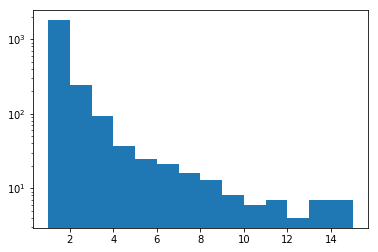

In [15]:
sortedList = list(hashtags.values())
sortedList.sort(reverse =True)

plt.hist(sortedList,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],log=True)
plt.show

In [16]:
#esistono caratteri asiatici, rimuovo
data['modded1'] = data["modded1"].str.replace("[^\x00-\x7F]",' ')

In [17]:
#remove &amp, special html character for &
data['modded1'] = data["modded1"].str.replace("&amp",' ')

#remove punctuation
data['modded1'] = data["modded1"].str.replace("[^\w\s]",'')

In [18]:
#rimosso &amp correttamente
for idx,row in data.iterrows():
    l = re.findall("&amp",row["modded1"])
    if len(l) != 0:
        print(row["modded1"])

In [19]:
#remove links
data["modded1"] = data["modded1"].str.replace("http\S+"," ")

data["noTags_punct"] = data["modded1"]

#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['modded1'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#there are empty rows
#data = data[data["modded1"] != ""]
data["modded1"]

0        sure tune watch donald trump late night david ...
1        donald trump appearing view tomorrow morning d...
2        donald trump reads top ten financial tips late...
3        new blog post celebrity apprentice finale less...
4        persona never wallflower rather build walls cl...
5        miss usa tara conner fired ive always believer...
6        listen interview donald trump discussing new b...
7        strive wholeness keep sense wonder intact dona...
8        enter think like champion signed book keychain...
9        achiever achieves plateau beginning donald j t...
10       afraid unique like afraid best self donald j t...
11          win lives champions view moment donald j trump
12       dayswe could use little power trumpative think...
13       always know could precipice something great do...
14       read great interview donald trump appeared new...
15          keep fast short direct whatever donald j trump
16       dont forget enter think like champion signed b.

In [20]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweets = []

for idx, row in data.iterrows():
    test = row["modded1"].split()
    desc = ""
    for el in test:
        desc = desc + " " + stemmer.stem(el) + " "
    stemmedTweets.append(desc)
temp = pd.Series(stemmedTweets)
data["modded1_stemmed"] = temp


In [21]:
data["modded1_stemmed"].head()

0     sure  tune  watch  donald  trump  late  night...
1     donald  trump  appear  view  tomorrow  morn  ...
2     donald  trump  read  top  ten  financi  tip  ...
3     new  blog  post  celebr  apprentic  final  le...
4     persona  never  wallflow  rather  build  wall...
Name: modded1_stemmed, dtype: object

In [23]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 7000]
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

NameError: name 'stemmed_words' is not defined

In [ ]:
stemmed_words

In [ ]:
c = 0
l = 0
for idx,row in data.iterrows():
    l = l + len(row["text"].split())
    c = c + len(row["modded1_stemmed"].split())
print("original text",l)
print("modded and stemmed",c)

In [28]:
#data.iloc[37251]["modded1"] == "" true
data = data[data["modded1"] != ""] 
data["modded1"]

0        sure tune watch donald trump late night david ...
1        donald trump appearing view tomorrow morning d...
2        donald trump reads top ten financial tips late...
3        new blog post celebrity apprentice finale less...
4        persona never wallflower rather build walls cl...
5        miss usa tara conner fired ive always believer...
6        listen interview donald trump discussing new b...
7        strive wholeness keep sense wonder intact dona...
8        enter think like champion signed book keychain...
9        achiever achieves plateau beginning donald j t...
10       afraid unique like afraid best self donald j t...
11          win lives champions view moment donald j trump
12       dayswe could use little power trumpative think...
13       always know could precipice something great do...
14       read great interview donald trump appeared new...
15          keep fast short direct whatever donald j trump
16       dont forget enter think like champion signed b.

In [29]:
print(len(data))

36159


In [ ]:
data["noTags_punct"]

In [ ]:
data.reset_index(inplace=True)
data.to_json("preprocessingDoneRight.json")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.sparse as sp
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(stop_words='english')

data1 = data[data["year"] == 2018]
X = vectorizer.fit_transform(data1["modded1"])

#for i, col in enumerate(vectorizer.get_feature_names()):
#    data2[col] = pd.SparseSeries(X[:, i].toarray().ravel(), fill_value=0)


#df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())   
#df1
#data2


true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print(model.inertia_)
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
    
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)
